In [3]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [4]:
print(train_data[0])
print(train_data.shape)
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
(25000,)
1


In [5]:
#since max words limited to 10000
max([max(value) for value in train_data])

9999

In [6]:
#decode the word back to english
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [7]:
import numpy as np
def vectorize_seq(sequence,dimension=10000):
    results=np.zeros((len(sequence),dimension))
    for i,sequence in enumerate(sequence):
        results[i,sequence]=1
    return results
x_train=vectorize_seq(train_data)
x_test=vectorize_seq(test_data)

In [8]:
x_train.shape

(25000, 10000)

In [41]:
print(train_labels)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train)

[1 0 0 ... 0 1 0]
[1. 0. 0. ... 0. 1. 0.]


In [39]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

model=Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
#validation set

x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]


In [45]:
history=model.fit(partial_x_train,
                  partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 12s 804us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 -

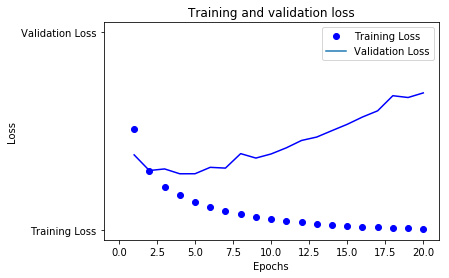

In [56]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs,loss_values,'bo','Training Loss')
plt.plot(epochs,val_loss_values,'b','Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'])
plt.show()

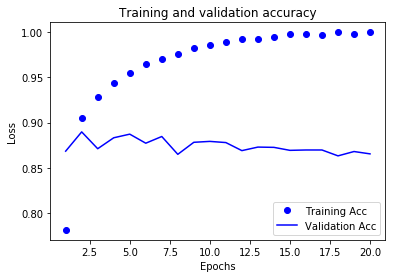

In [58]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Acc','Validation Acc'])
plt.show()

In [60]:
y=model.predict(x_test)

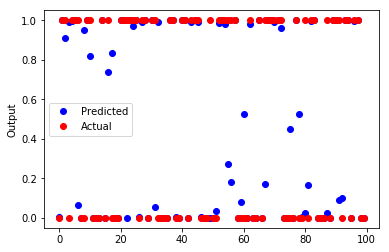

In [64]:
plt.plot(y[:100],'bo')
plt.plot(y_test[:100],'ro')
plt.legend(['Predicted','Actual'])
plt.ylabel('Output')
plt.show()